# Ensemble learning and random forests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Training a voting classifier on the moons dataset.

In [2]:
from sklearn.datasets import make_moons

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [7]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

### Determing the accurancy of each classifier

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.904


#### Soft Voting.

In [10]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [11]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


### Bagging and Pasting.
#### Implementing in scikit learn.

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, 
    max_samples=100, bootstrap=True, n_jobs=-1)
## training 500 decision trees with 100 samples each with replacement allowed, and using all available CPU cores.
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [14]:
y_pred = bag_clf.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.92

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, 
    max_samples=100, bootstrap=False, n_jobs=-1)
## training 500 decision trees with 100 samples each with replacement not allowed (pasting), and using all available CPU cores.
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [17]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.936

### Out-of-bag evaluation

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

In [19]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [20]:
bag_clf.oob_score_

0.904

#### According to this oob evaluation, this BaggingClassifier is likely to achieve about 90% accuracy on the test set.

In [21]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

### Random Forests. 
#### RandomForestClassifier class.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_jobs=-1)

In [24]:
y_pred_rnd = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rnd)

0.928

### Extra-Trees

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
ext_tree_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ext_tree_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [27]:
y_pred_ext = ext_tree_clf.predict(X_test)
accuracy_score(y_test, y_pred_ext)

0.92

### Feature Importance.
#### Training a RandomForestClassifier on the iris dataset and output each feature’s importance.

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [29]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

## Boosting
### AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)

In [31]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(ada_clf,X_train, y_train, scoring="accuracy", cv=3)

array([0.904, 0.896, 0.88 ])

## Gradient Boosting

In [33]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [35]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [36]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [37]:
X_new = np.array([[0.8]])

In [38]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [39]:
y_pred

array([0.75026781])

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [41]:
cross_val_score(gbrt, X, y, scoring="r2", cv=3)

array([0.76681994, 0.84663497, 0.84100693])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [44]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [45]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [46]:
best_n_estimators = np.argmin(errors) + 1

In [47]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=41)

In [48]:
cross_val_score(gbrt_best, X_train, y_train, scoring="r2", cv=3)

array([0.90998048, 0.93556809, 0.91703027])

Text(0.5, 1.0, 'Validation error')

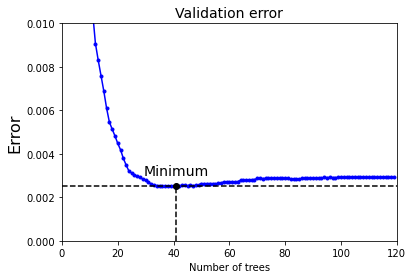

In [49]:
min_error = np.min(errors)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

#### implementing using warm_start=True

In [50]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

In [51]:
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [52]:
gbrt.n_estimators_

46

## XGBoost

In [54]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_val, y_pred)

0.9351410376292149

#### Early stopping in XGBoost

In [57]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)

[0]	validation_0-rmse:0.24646
[1]	validation_0-rmse:0.17707
[2]	validation_0-rmse:0.13163
[3]	validation_0-rmse:0.10281
[4]	validation_0-rmse:0.08232
[5]	validation_0-rmse:0.06920
[6]	validation_0-rmse:0.06150
[7]	validation_0-rmse:0.05702
[8]	validation_0-rmse:0.05500
[9]	validation_0-rmse:0.05502
[10]	validation_0-rmse:0.05562


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)